# Final Report
## 1. Problem
#### In today’s fast-paced corporate world, workplace stress has become a growing concern. High stress levels negatively impact employee performance, health, and overall company productivity. Many organizations struggle to identify and mitigate stress due to the lack of proper data-driven analysis.

#### This project aims to analyze and predict employee stress levels based on various personal, professional, and lifestyle attributes. By doing so, companies can take informed actions to improve employee well-being and create healthier work environments.


## 2. Data Mining Task
#### The problem is framed as both a classification and clustering task:
#### Classification
- **Type:** Supervised Learning
- **Class Attribute:** Stress_Level
- **Goal:** To predict the employee’s level of stress (Low, Moderate, or High) based on various features such as job role, salary, working hours, and lifestyle factors.
- **Purpose:** This task enables organizations to proactively identify employees who are at risk of high stress levels, allowing timely support and intervention.



#### Clustering
- **Type:** Unsupervised Learning
- **Goal:** To group employees into distinct clusters based on shared characteristics that contribute to stress, without using the stress label (Stress_Level).
- **Purpose:** This task helps uncover hidden patterns or stress profiles in the workforce, which can inform more personalized wellness and HR strategies.

## 3. Data




Source: https://www.kaggle.com/datasets/ashaychoudhary/corporate-stress-dataset-insights-into-workplace

In [ ]:
import pandas as pd
import numpy as np


# Load the dataset
df = pd.read_csv('Dataset/Original_dataset.csv')

# Create a DataFrame to show attribute information
attribute_informations = pd.DataFrame({
    'AttributeName' : df.columns,
    'DataType' : df.dtypes.values
})

# Display information about the dataset
print(f"Number of attributes: {len(df.columns)}")
print('\n')
print(f"Number of objects: {len(df)}")
print('\n')
print("Attributes and Their Types:")
print(attribute_informations)


Number of attributes: 30


Number of objects: 50000


Attributes and Their Types:
                       AttributeName DataType
0                                 ID    int64
1                                Age    int64
2                             Gender   object
3                     Marital_Status   object
4                           Job_Role   object
5                   Experience_Years    int64
6                 Monthly_Salary_INR  float64
7             Working_Hours_per_Week    int64
8                 Commute_Time_Hours  float64
9                        Remote_Work     bool
10                      Stress_Level    int64
11                     Health_Issues   object
12                      Company_Size   object
13                        Department   object
14                       Sleep_Hours  float64
15  Physical_Activity_Hours_per_Week  float64
16         Mental_Health_Leave_Taken     bool
17             Manager_Support_Level    int64
18               Work_Pressure_Level    int6

**Attributes’ description**

In [ ]:
from IPython.core.display import display

data = {
    "Attribute Name": [
        "ID", "Age", "Gender", "Marital_Status", "Job_Role", "Experience_Years", "Monthly_Salary_INR",
        "Working_Hours_per_Week", "Commute_Time_Hours", "Stress_Level", "Manager_Support_Level",
        "Work_Pressure_Level", "Annual_Leaves_Taken", "Work_Life_Balance", "Family_Support_Level",
        "Job_Satisfaction", "Performance_Rating", "Team_Size", "Burnout_Symptoms", "Location"
    ],
    "Description": [
        "Unique Identifier for each entry", "Age of the employee", "Gender of the employee",
        "Marital status of the employee", "Job role in the company", "Years of experience",
        "Monthly salary in INR", "Weekly working hours", "Commute time in hours", "Stress level",
        "Level of manager support", "Work pressure level", "Annual leaves taken", "Work-life balance",
        "Family support level", "Job satisfaction level", "Performance rating", "Size of the team",
        "Burnout symptoms level", "Location of the employee"
    ],
    "Data Type": [
        "Numeric", "Numeric", "Categorical", "Categorical", "Categorical", "Numeric", "Numeric",
        "Numeric", "Numeric", "Numeric", "Numeric", "Numeric", "Numeric", "Numeric", "Numeric",
        "Numeric", "Numeric", "Numeric", "Numeric", "Categorical"
    ],
    "Possible Values": [
        "Unique ID for each row", "Range between 18-65", "Male, Female, Other", "Single, Married, Divorced",
        "Various job roles in the organization", "Range based on years", "Range of salary in INR",
        "Range based on weekly working hours", "Range based on commute time", "Range based on stress levels",
        "Range based on support levels", "Range based on work pressure", "Range based on leaves taken",
        "Range based on work-life balance", "Range based on family support", "Range based on job satisfaction",
        "Range based on performance rating", "Range based on team size", "Range based on burnout symptoms",
        "Location of the employee"
    ]
}

attributes_df = pd.DataFrame(data)

display(attributes_df)


C:\Users\haloo\AppData\Local\Temp\ipykernel_20556\1602333008.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython.display
  from IPython.core.display import display


,Attribute Name,Description,Data Type,Possible Values
0,ID,Unique Identifier for each entry,Numeric,Unique ID for each row
1,Age,Age of the employee,Numeric,Range between 18-65
2,Gender,Gender of the employee,Categorical,"Male, Female, Other"
3,Marital_Status,Marital status of the employee,Categorical,"Single, Married, Divorced"
4,Job_Role,Job role in the company,Categorical,Various job roles in the organization
5,Experience_Years,Years of experience,Numeric,Range based on years
6,Monthly_Salary_INR,Monthly salary in INR,Numeric,Range of salary in INR
7,Working_Hours_per_Week,Weekly working hours,Numeric,Range based on weekly working hours
8,Commute_Time_Hours,Commute time in hours,Numeric,Range based on commute time
9,Stress_Level,Stress level,Numeric,Range based on stress levels


**Sample of 20 people**

In [ ]:
sample=df.sample(n=20);
sample

,ID,Age,Gender,Marital_Status,Job_Role,Experience_Years,Monthly_Salary_INR,Working_Hours_per_Week,Commute_Time_Hours,Remote_Work,...,Work_Life_Balance,Family_Support_Level,Job_Satisfaction,Performance_Rating,Team_Size,Training_Opportunities,Gender_Bias_Experienced,Discrimination_Experienced,Burnout_Symptoms,Location
49301,49302,49,Female,Divorced,Manager,24,115311.99,77,2.01,True,...,4,10,9,5,29,False,False,False,Yes,Tier-1
3975,3976,20,Female,Widowed,Analyst,13,78422.35,46,1.24,False,...,5,4,2,0,40,False,True,False,Occasional,Metro
49195,49196,40,Non-Binary,Single,Sales,30,62185.18,83,2.79,True,...,3,5,1,2,86,False,True,False,Occasional,Tier-1
23231,23232,41,Male,Divorced,HR,10,88047.09,90,2.62,True,...,8,1,6,1,82,False,True,True,No,Tier-3
33053,33054,53,Female,Single,Analyst,36,147831.52,85,0.47,True,...,1,2,0,8,88,False,True,True,No,Tier-2
455,456,57,Non-Binary,Married,Sales,24,104788.37,90,2.78,True,...,4,6,8,7,1,False,False,True,No,Tier-3
9912,9913,55,Male,Widowed,Support,35,96090.26,67,1.21,True,...,0,1,0,10,64,True,True,True,No,Metro
48293,48294,58,Male,Widowed,Support,19,142930.36,68,0.86,False,...,3,4,2,7,21,False,False,True,Yes,Tier-2
34823,34824,27,Male,Married,Developer,22,158529.56,85,1.21,False,...,2,5,8,1,63,False,True,False,Yes,Tier-3
3137,3138,50,Male,Single,Manager,6,39651.55,65,1.47,True,...,0,5,4,6,4,False,False,True,Yes,Metro


**Show missing data:**

In [ ]:
missing_counts = df.isnull().sum()
print("Missing values in each column:")
print(missing_counts)
print()
rows_with_missing = df.isnull().sum(axis=1)
print("Rows with missing values:")
print(rows_with_missing);


Missing values in each column:
ID                                  0
Age                                 0
Gender                              0
Marital_Status                      0
Job_Role                            0
Experience_Years                    0
Monthly_Salary_INR                  0
Working_Hours_per_Week              0
Commute_Time_Hours                  0
Remote_Work                         0
Stress_Level                        0
Health_Issues                       0
Company_Size                        0
Department                          0
Sleep_Hours                         0
Physical_Activity_Hours_per_Week    0
Mental_Health_Leave_Taken           0
Manager_Support_Level               0
Work_Pressure_Level                 0
Annual_Leaves_Taken                 0
Work_Life_Balance                   0
Family_Support_Level                0
Job_Satisfaction                    0
Performance_Rating                  0
Team_Size                           0
Training_Opportunit

**Summary of data:**

In [ ]:
summary=df.describe();
print(summary);

                 ID           Age  Experience_Years  Monthly_Salary_INR  \
count  50000.000000  50000.000000      50000.000000        50000.000000   
mean   25000.500000     41.518600         20.071580       110129.926165   
std    14433.901067     13.833279         11.835681        52069.676542   
min        1.000000     18.000000          0.000000        20001.960000   
25%    12500.750000     30.000000         10.000000        64875.487500   
50%    25000.500000     41.000000         20.000000       110168.205000   
75%    37500.250000     54.000000         30.000000       155322.665000   
max    50000.000000     65.000000         40.000000       199992.800000   

       Working_Hours_per_Week  Commute_Time_Hours  Stress_Level   Sleep_Hours  \
count             50000.00000        50000.000000  50000.000000  50000.000000   
mean                 62.53824            1.500454      5.004680      6.498888   
std                  16.16981            0.867738      3.154745      1.437200   


**Calculate the variance :**

In [ ]:
variance= df.var(numeric_only=True);
print(variance)

ID                                  2.083375e+08
Age                                 1.913596e+02
Experience_Years                    1.400833e+02
Monthly_Salary_INR                  2.711251e+09
Working_Hours_per_Week              2.614628e+02
Commute_Time_Hours                  7.529698e-01
Remote_Work                         2.499831e-01
Stress_Level                        9.952417e+00
Sleep_Hours                         2.065544e+00
Physical_Activity_Hours_per_Week    8.323575e+00
Mental_Health_Leave_Taken           2.500028e-01
Manager_Support_Level               9.987583e+00
Work_Pressure_Level                 9.983160e+00
Annual_Leaves_Taken                 7.998436e+01
Work_Life_Balance                   1.002183e+01
Family_Support_Level                9.989863e+00
Job_Satisfaction                    9.985788e+00
Performance_Rating                  1.009037e+01
Team_Size                           8.347696e+02
Training_Opportunities              2.500017e-01
Gender_Bias_Experien

**Histogram:**

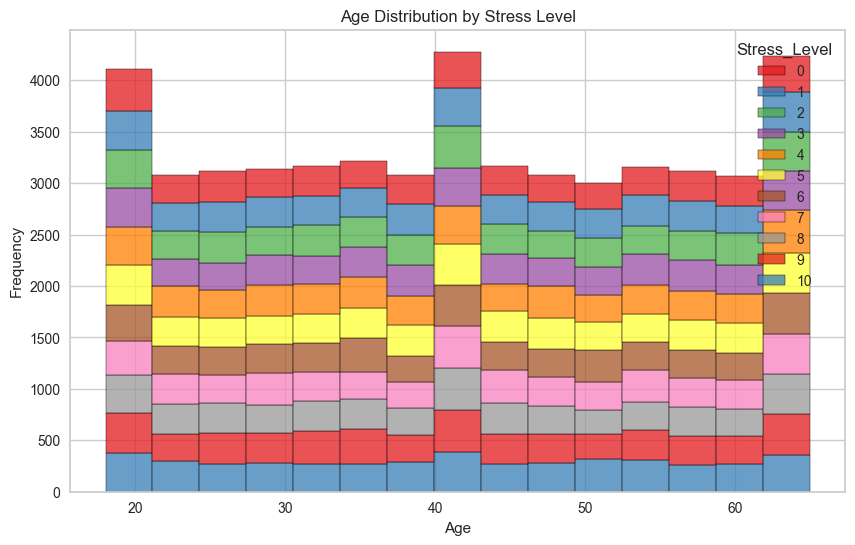

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Age', hue='Stress_Level', multiple='stack', palette='Set1', bins=15)
plt.title('Age Distribution by Stress Level')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


**Pie Chart:**

[ 0  7  6  8  2  4  1  9  3 10  5]


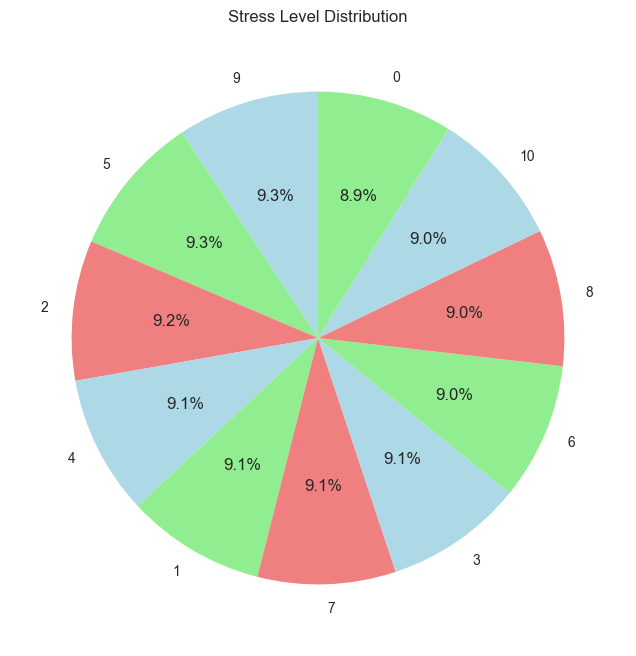

In [ ]:
print(df['Stress_Level'].unique())


stress_level_counts = df['Stress_Level'].value_counts()


stress_level_counts = stress_level_counts.dropna()

plt.figure(figsize=(8,8))
plt.pie(stress_level_counts, labels=stress_level_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Stress Level Distribution')
plt.show()

**Scatter Plot:**

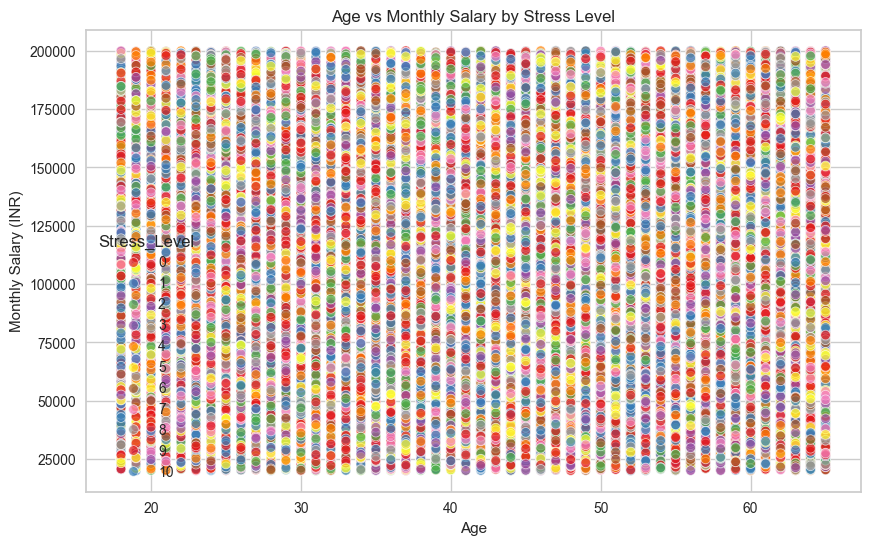

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Age', y='Monthly_Salary_INR', hue='Stress_Level', palette='Set1', alpha=0.7)
plt.title('Age vs Monthly Salary by Stress Level')
plt.xlabel('Age')
plt.ylabel('Monthly Salary (INR)')
plt.grid(True)
plt.show()

## 4. Data Pre-processing

- checking for missing values:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from scipy import stats
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("corporate_stress_dataset.csv")

print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
ID                                      0
Age                                     0
Gender                                  0
Marital_Status                          0
Job_Role                                0
Experience_Years                        0
Monthly_Salary_INR                      0
Working_Hours_per_Week                  0
Commute_Time_Hours                      0
Remote_Work                             0
Stress_Level                            0
Health_Issues                       12541
Company_Size                            0
Department                              0
Sleep_Hours                             0
Physical_Activity_Hours_per_Week        0
Mental_Health_Leave_Taken               0
Manager_Support_Level                   0
Work_Pressure_Level                     0
Annual_Leaves_Taken                     0
Work_Life_Balance                       0
Family_Support_Level                    0
Job_Satisfaction                        0
Perform

We started by checking the dataset for any missing or null values, as missing data can negatively impact the quality of analysis and model performance. Upon inspection, we found that all columns were complete and contained no missing values. This allowed us to proceed without needing to fill or remove any records. However, we noticed an issue with the 'None' value in the dataset. It's clear that there is a misunderstanding because 'None' here means 'No Disease.' To ensure this won't affect the pre-processing, we will change 'None' to 'No Disease' for clarity.

In [ ]:
df['Health_Issues'] = df['Health_Issues'].fillna('No Disease')
print(df.isnull().sum())

ID                                  0
Age                                 0
Gender                              0
Marital_Status                      0
Job_Role                            0
Experience_Years                    0
Monthly_Salary_INR                  0
Working_Hours_per_Week              0
Commute_Time_Hours                  0
Remote_Work                         0
Stress_Level                        0
Health_Issues                       0
Company_Size                        0
Department                          0
Sleep_Hours                         0
Physical_Activity_Hours_per_Week    0
Mental_Health_Leave_Taken           0
Manager_Support_Level               0
Work_Pressure_Level                 0
Annual_Leaves_Taken                 0
Work_Life_Balance                   0
Family_Support_Level                0
Job_Satisfaction                    0
Performance_Rating                  0
Team_Size                           0
Training_Opportunities              0
Gender_Bias_

- Outlier Detection and Removal:

We applied two techniques to identify outliers in the dataset:

Boxplot Visualization: The boxplot analysis did not reveal any significant or unrealistic outliers.

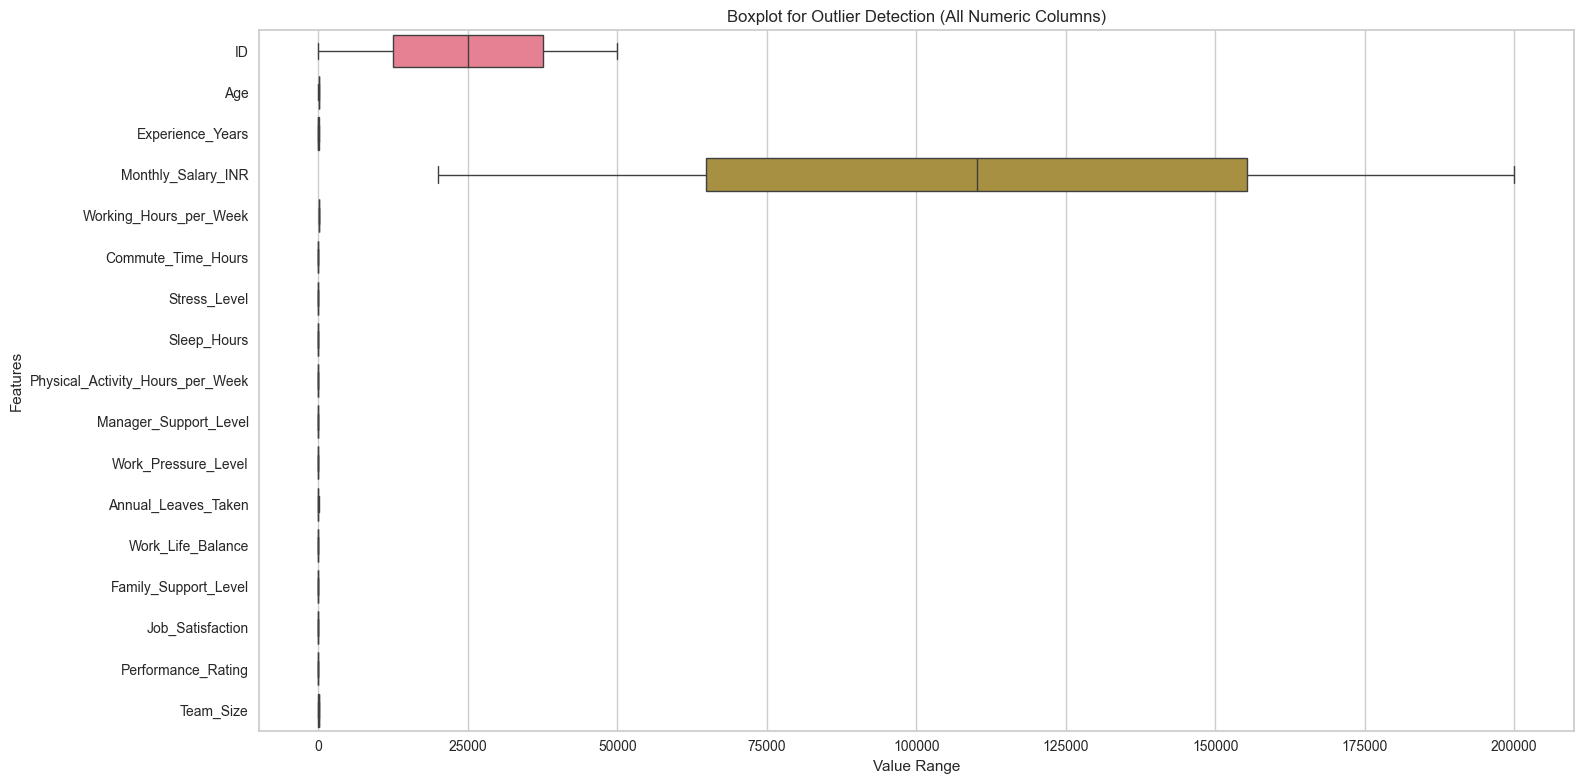

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(16, 8))
sns.boxplot(data=df[numeric_cols], orient='h')
plt.title("Boxplot for Outlier Detection (All Numeric Columns)")
plt.xlabel("Value Range")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

Statistical Methods (IQR and Z-Score): We used the Interquartile Range and Z-Score methods to detect extreme values. However, the number of rows remained unchanged at 50,000, indicating that no values needed to be removed.

In [ ]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = df[((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
print("\nNumber of outliers (IQR method):", outliers_iqr.shape[0])

z_scores = np.abs(stats.zscore(df[numeric_cols]))
outliers_z = df[(z_scores > 3).any(axis=1)]
print("Number of outliers (Z-score):", outliers_z.shape[0])


Number of outliers (IQR method): 0
Number of outliers (Z-score): 0


- Variable Transformation:

1. Label Encoding We transformed categorical text values into numerical values to make the dataset compatible with machine learning models. For example, the Gender column was encoded where 1 represents male and 0 represents female. This step is essential as most algorithms require numerical input.

In [ ]:
if 'date_column' in df.columns:
    df['date_column'] = pd.to_datetime(df['date_column'], errors='coerce')

for col in df.select_dtypes(include=['object']).columns:
    label_enc = LabelEncoder()
    df[col] = label_enc.fit_transform(df[col])

2. Normalization (Min-Max Scaling) The dataset contains several numerical features with varying scales — for instance, Monthly_Salary_INR has much higher values compared to Working_Hours_per_Week. To ensure that each feature contributes equally to the model, we applied Min-Max normalization, which scales the data to a [0, 1] range. This improves model performance by preventing features with large values from dominating.

In [ ]:
balanced_filtered_df = pd.read_csv('Dataset/Original_dataset.csv')
columns_to_normalize = ['Stress_Level','Experience_Years','Monthly_Salary_INR','Working_Hours_per_Week','Commute_Time_Hours','Sleep_Hours','Physical_Activity_Hours_per_Week','Manager_Support_Level','Work_Pressure_Level','Annual_Leaves_Taken','Work_Life_Balance','Family_Support_Level','Job_Satisfaction','Performance_Rating','Team_Size']
data_to_normalize = balanced_filtered_df[columns_to_normalize]

minmax_scaler = MinMaxScaler()
normalized_data_minmax = minmax_scaler.fit_transform(data_to_normalize)

balanced_filtered_df[columns_to_normalize] = normalized_data_minmax
print(balanced_filtered_df[columns_to_normalize] )

       Stress_Level  Experience_Years  Monthly_Salary_INR  \
0               0.0             0.125            0.459474   
1               0.7             0.500            0.808830   
2               0.7             0.250            0.100024   
3               0.6             0.650            0.172928   
4               0.8             0.725            0.858908   
...             ...               ...                 ...   
49995           0.0             0.200            0.081072   
49996           0.1             0.775            0.544050   
49997           0.6             0.175            0.498984   
49998           0.4             0.225            0.305107   
49999           0.9             0.000            0.065455   

       Working_Hours_per_Week  Commute_Time_Hours  Sleep_Hours  \
0                    0.163636            0.573333         0.32   
1                    0.345455            0.206667         1.00   
2                    0.836364            0.406667         0.78   
3  

3. Discretization We applied discretization to convert continuous numerical data into categorical intervals for better interpretation:
Age: Divided into bins such as “18–25,” “26–30,” ..., up to “61–65.”

Working Hours per Week: Grouped into categories: “Part-time,” “Full-time,” “Overtime,” and “Extreme.”

These transformations helped simplify data analysis and allowed for easier pattern discovery related to stress levels across different age and workload groups.

In [ ]:
balanced_filtered_df = pd.read_csv('Dataset/Original_dataset.csv')
bins=[18,25,30,35,40,45,50,55,60,65]
labels=['18-25','26-30','31-35','36-40','41-45','46-50','51-55','56-60','61-65']
balanced_filtered_df['Age'] = pd.cut(balanced_filtered_df['Age'], bins=bins, labels=labels, right=False)
print(balanced_filtered_df[['Age']])
bins = [0, 20, 40, 60, 100]
labels = ['Part-time', 'Full-time', 'Overtime', 'Extreme']
balanced_filtered_df['Working_Hours_per_Week'] = pd.cut(balanced_filtered_df['Working_Hours_per_Week'], bins=bins, labels=labels, right=False)
print(balanced_filtered_df[['Working_Hours_per_Week']])

         Age
0      56-60
1      46-50
2      31-35
3      61-65
4      26-30
...      ...
49995  41-45
49996  46-50
49997  41-45
49998  61-65
49999  18-25

[50000 rows x 1 columns]
      Working_Hours_per_Week
0                   Overtime
1                   Overtime
2                    Extreme
3                    Extreme
4                    Extreme
...                      ...
49995               Overtime
49996               Overtime
49997               Overtime
49998                Extreme
49999               Overtime

[50000 rows x 1 columns]


- Balance Data:

Before starting the Data Mining Technique, we investigated whether the data was balanced or not and we reviewed the percentage for each class in the Stress Level attribute (Low, Moderate, and High), and we noticed that the data was already balanced across the three categories, each comprising exactly one-third of the dataset.

```
Number of Low Stress cases: 1654  
Number of Moderate Stress cases: 1654  
Number of High Stress cases: 1654  
___  
Percentage of Low Stress cases: 33.33%  
Percentage of Moderate Stress cases: 33.33%  
Percentage of High Stress cases: 33.33%
```


- Process of correcting data balancing:
We used the resample function from the sklearn.utils module to ensure further consistency in case balancing and limit the sample size to avoid bias or overfitting. We selected 60% of the maximum number of samples from each class:





```
Final number of Low Stress cases: 992  
Final number of Moderate Stress cases: 992  
Final number of High Stress cases: 992

Percentage of Low Stress cases: 33.33%  
Percentage of Moderate Stress cases: 33.33%  
Percentage of High Stress cases: 33.33%
```



After balancing, we recalculated the percentages to ensure uniform distribution. This confirms that the dataset remained perfectly balanced after resampling. Equal representation helps the model learn each class equally and generalize better to unseen data.

Data before Pre-processing:



```
 ID  Age      Gender Marital_Status   Job_Role  Experience_Years  \
19466  19467   65  Non-Binary        Married         HR                 1   
7781    7782   39        Male        Married    Support                 4   
23943  23944   23  Non-Binary       Divorced    Manager                 9   
42081  42082   39        Male         Single         HR                 7
 Monthly_Salary_INR  Working_Hours_per_Week  Commute_Time_Hours  \
19466            75453.01                      53                1.39   
7781             80428.52                      51                0.44   
23943            99445.11                      69                1.84   
42081            98679.18                      66                2.48   
47938            97895.89                      56                2.10
  Remote_Work  ...  Work_Life_Balance Family_Support_Level  \
19466         True  ...                  9                    7   
7781         False  ...                  3                    8   
23943        False  ...                  2                    6   
42081         True  ...                  5                    8   
47938        False  ...                  9                    3  
Job_Satisfaction Performance_Rating  Team_Size  Training_Opportunities  \
19466                8                  4         20                   False   
7781                 9                  4         47                   False   
23943                1                  9          4                   False   
42081                3                  7         90                   False   
47938                9                  7         55                   False
 Gender_Bias_Experienced  Discrimination_Experienced  Burnout_Symptoms  \
19466                    False                       False                No   
7781                     False                        True                No   
23943                     True                        True               Yes   
42081                     True                       False               Yes   
47938                    False                        True        Occasional
Location  
19466     Metro  
7781      Metro  
23943    Tier-1  
42081     Metro  
47938     Metro
```




Data After Pre-processing:
```
  ID  Age  Gender  Marital_Status  Job_Role  Experience_Years  \
0  41022   46       2               3         3                 9   
1   1945   28       0               0         2                33   
2  32242   27       2               0         2                24   
3   8515   22       2               2         2                 7   
4  47427   33       1               3         2                40   

   Monthly_Salary_INR  Working_Hours_per_Week  Commute_Time_Hours  \
0            80691.45                      67                2.29   
1           115064.67                      54                0.23   
2           139418.79                      48                2.33   
3           143112.75                      88                2.49   
4           190397.60                      57                2.55   

   Stress_Level  ...  Manager_Support_Level  Work_Pressure_Level  \
0             0  ...                      2                    5   
1             0  ...                      6                    8   
2             0  ...                      6                    1   
3             0  ...                      5                    2   
4             0  ...                      5                    2   

   Annual_Leaves_Taken  Work_Life_Balance  Family_Support_Level  \
0                   22                  4                     0   
1                    2                 10                     6   
2                   14                  6                     3   
3                   30                  5                     6   
4                   18                  5                     6   

   Job_Satisfaction  Performance_Rating  Team_Size  Burnout_Symptoms  Location  
0                 4                   1         64                 2         3  
1                10                   5         17                 2         0  
2                 7                   5         94                 0         3  
3                 0                   6         16                 1         1  
4                10                   2         34                 2         2  

[5 rows x 25 columns]

```



## 5. Data Mining Technique
 we applied two key data mining techniques: classification and clustering. Each technique was chosen based on the nature of the problem and the goals of the analysis.

Classification: Decision Tree (Supervised Learning)
We used a Decision Tree Classifier as our supervised learning model to predict stress levels. Decision trees were chosen due to their interpretability, ease of visualization, and suitability for both numerical and categorical data. Additionally, they are effective for datasets where the relationship between features and class labels can be captured using a set of decision rules.

Implementation:
The target variable was Stress_Level, and the rest of the features were used as inputs.

The dataset was split into training and testing sets using train_test_split.
The model was trained using DecisionTreeClassifier from the sklearn.tree module.
Evaluation metrics included accuracy_score and confusion_matrix.
The decision tree structure was visualized using tree.plot_tree.

Python Packages Used:
pandas for data preprocessing
sklearn.tree, sklearn.model_selection, sklearn.metrics for model training and evaluation
matplotlib.pyplot for visualizations



Accuracy: 0.0874

Classification Report:
               precision    recall  f1-score   support

           0       0.08      0.08      0.08      1330
           1       0.09      0.09      0.09      1405
           2       0.08      0.08      0.08      1382
           3       0.08      0.08      0.08      1339
           4       0.09      0.09      0.09      1370
           5       0.09      0.09      0.09      1379
           6       0.09      0.09      0.09      1305
           7       0.10      0.10      0.10      1338
           8       0.08      0.08      0.08      1368
           9       0.10      0.10      0.10      1397
          10       0.09      0.08      0.08      1387

    accuracy                           0.09     15000
   macro avg       0.09      0.09      0.09     15000
weighted avg       0.09      0.09      0.09     15000



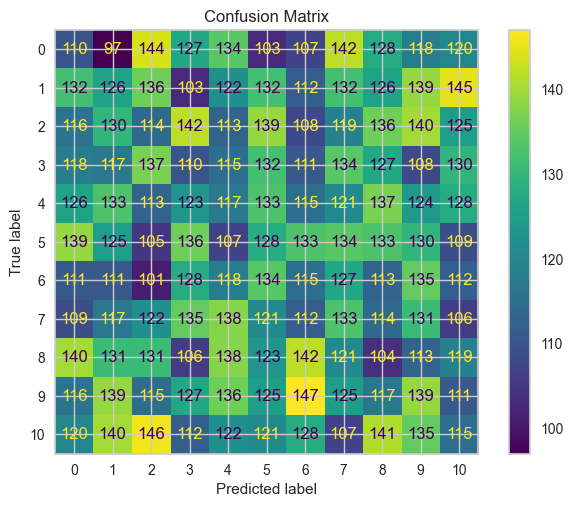

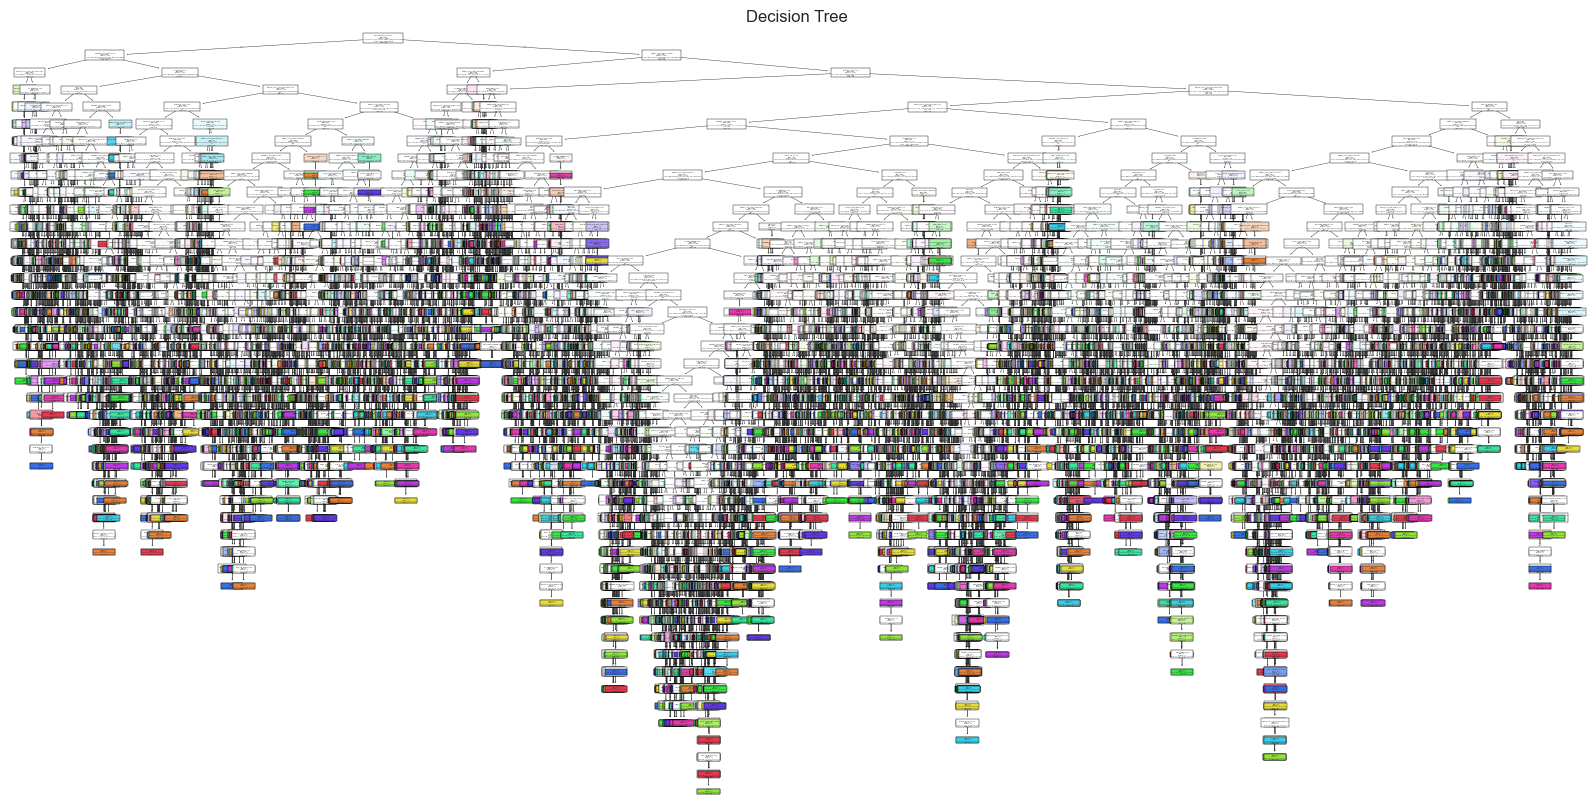

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn import tree

# Load the dataset
df = pd.read_csv("corporate_stress_dataset.csv")

# Drop ID column (not useful)
df = df.drop(columns=['ID'])

# Handle categorical features using one-hot encoding
df_encoded = pd.get_dummies(df.drop(columns=['Stress_Level']), drop_first=True)

# Target variable
y = df['Stress_Level']
X = df_encoded

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

# Plot the Decision Tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names=X.columns, class_names=True, filled=True)
plt.title("Decision Tree")
plt.show()




Clustering: K-Means (Unsupervised Learning)
We also applied K-Means Clustering as an unsupervised learning method to explore hidden groupings within the dataset. This helped in identifying natural clusters among data points based on feature similarity.

Justification: K-Means is efficient, easy to implement, and works well when the number of clusters is known or can be estimated. To validate the quality and number of clusters, we used the Silhouette Score and Elbow Method.

Implementation:
The features were normalized using MinMaxScaler from sklearn.preprocessing.
Multiple values of k (number of clusters) were tested, ranging from 2 to 10.
The optimal number of clusters was determined based on the highest silhouette score.
Results were visualized using line plots and silhouette diagrams.

Python Packages Used:
pandas, numpy for data handling
sklearn.cluster.KMeans, sklearn.metrics.silhouette_score, silhouette_samples
matplotlib.pyplot, seaborn, and matplotlib.cm for visualization


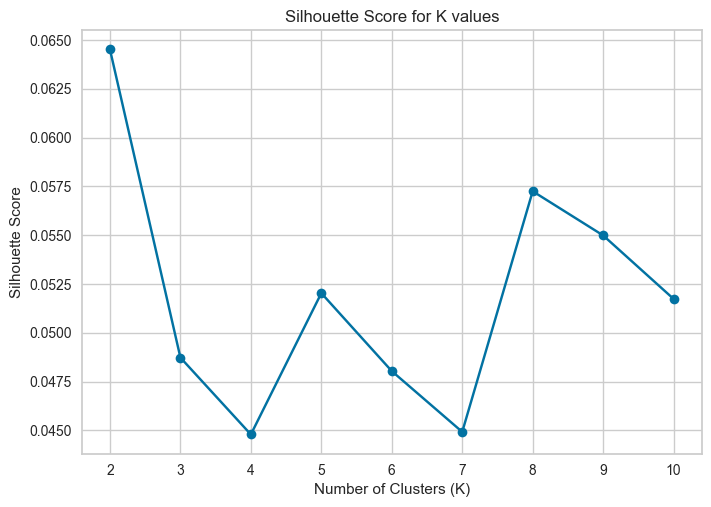

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Dataset/Original_dataset.csv")

# Encode categorical columns
label_encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])

# Drop the target column for clustering
X = df.drop("Stress_Level", axis=1)

# Normalize the features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(X)

# Find the best K using silhouette score
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_scores.append(score)

# Plot silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title("Silhouette Score for K values")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

## 6. Evaluation and Comparison

###  Classification Accuracy Table

| Train/Test Split | IG (Information Gain) | Gini Index |
|------------------|------------------------|-------------|
| 90% / 10%        | 21.5%                  | 26.2%       |
| 80% / 20%        | 25.7%                  | 25.3%       |
| 70% / 30%        | 24.9%                  | 23.0%       |

**The results show that Gini achieved slightly higher accuracy in the 90/10 split, while IG outperformed Gini in the 80/20 and 70/30 splits. However, the overall accuracy is relatively low, suggesting that the dataset might be complex or may require additional preprocessing or feature engineering.**


---



###  Confusion Matrices for Classification

We calculated confusion matrices for both IG and Gini across three train/test splits:

#### 90% / 10% Split

- **IG:**<br>
[ 9 22 23 28]<br> [21 22 20 22] <br>[18 17 18 17] <br>[13 18 15 15]

- **Gini:**<br>
[22 19 19 22] <br>[21 19 22 23]<br> [13 12 29 16]<br> [14 19 20 8]


####  80% / 20% Split

- **IG:**<br>
[40 42 36 35] <br>[48 40 34 39]<br> [39 45 38 32] <br>[30 35 28 35]


- **Gini:**<br>
[37 36 40 40]<br> [37 43 40 41] <br>[36 51 33 34] <br>[28 31 31 38]

#### 70% / 30% Split

- **IG:**<br>
[62 47 71 61] <br>[52 60 56 57]<br> [50 60 52 62] <br>[53 43 59 48]


- **Gini:**<br>
[52 65 58 66] <br>[49 49 65 62] <br>[56 54 52 62] <br>[48 50 53 52]


**Confusion matrices indicate significant misclassification across all partitions. Neither the IG nor the Gini coefficient dominate across all partitions, although the Gini model performs better in some areas, particularly the 90/10 partition. Both models appear to have difficulty distinguishing between classes.**

------



###  Clustering Evaluation Table (K-Means)

| K Value | Average Silhouette Score | Total Within-Cluster Sum of Squares (WCSS) |
|---------|---------------------------|--------------------------------------------|
| 2       | 0.046                     | 7874.46                                    |
| 3       | 0.040                     | 7622.41                                    |
| 4       | 0.042                     | 7429.63                                    |

**The highest silhouette score was observed when K=2, indicating better separation between clusters. However, WCSS continuously decreased as K increased, showing more compact clusters. This implies that K=4 provided better internal cohesion, while K=2 gave clearer group distinction. A balance between interpretability and compactness might be achieved at K=3.**



-----
### Below are the codes for what was explained previously.

##### K-Means Clustering Visualization

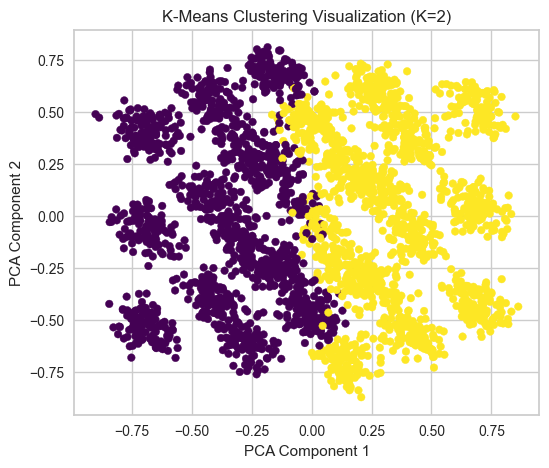

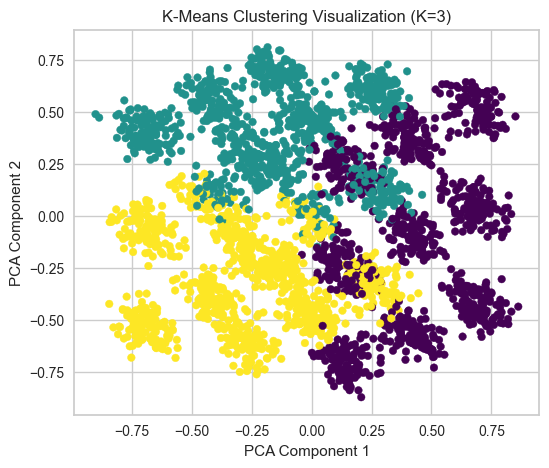

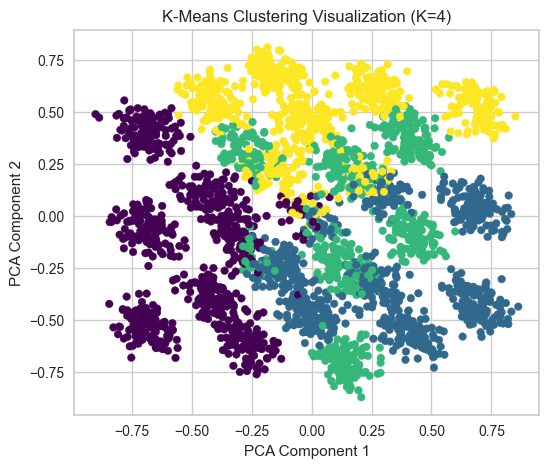

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd


df_clean = pd.read_csv("Dataset/Balanced_Processed_dataset.csv")
X = df_clean.drop("Stress_Level", axis=1)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


for k in [2, 3, 4]:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)

    plt.figure(figsize=(6, 5))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=30)
    plt.title(f'K-Means Clustering Visualization (K={k})')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.grid(True)
    plt.show()


#### Visualizing K-Means Clustering Using Principal Component Analysis (PCA)

To better understand the separation and structure of the clusters, we applied Principal Component Analysis (PCA) to reduce the dimensionality of the dataset to two components, and visualized the K-Means clustering results for K = 2, 3, and 4.

- K = 2
The clustering result at K = 2 shows a clear split between two clusters. This suggests a likely natural binary separation of the data, as evidenced by the high shadow score at this value. The two clusters are relatively separate along the first principal component.

- K = 3
At K = 3, the graph shows three distinct clusters, but with some overlapping points. This indicates a finer segmentation of the data. The clusters are more mixed in distribution, and the separation is not as pronounced as with K = 2. This result corresponds to a slightly lower shadow score.

- K = 4
The visualization for K = 4 shows four clusters with greater overlap and complexity at their boundaries. This indicates that while the sum of squares of the groups decreased (as the WCSS improved), the overall separation between the groups became less clear. This reflects a balance between internal consistency and distinctiveness between the groups.

**While K = 4 shows better consistency, K = 2 provides clearer separation of the groups. Therefore, the optimal number of groups depends on whether interpretability or internal consistency is more important for the analysis.**

##### Classification Accuracy Table

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

df = pd.read_csv("Dataset/Balanced_Processed_dataset.csv")
X = df.iloc[:, :-1]
y = df.iloc[:, -1]


splits = [(0.9, 0.1), (0.8, 0.2), (0.7, 0.3)]
results = []

for train_size, test_size in splits:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=42)

    # IG (Entropy)
    clf_ig = DecisionTreeClassifier(criterion="entropy", random_state=42)
    clf_ig.fit(X_train, y_train)
    acc_ig = accuracy_score(y_test, clf_ig.predict(X_test))

    # Gini
    clf_gini = DecisionTreeClassifier(criterion="gini", random_state=42)
    clf_gini.fit(X_train, y_train)
    acc_gini = accuracy_score(y_test, clf_gini.predict(X_test))

    results.append({
        "Training/Testing Split": f"{int(train_size*100)}% / {int(test_size*100)}%",
        "IG Accuracy": acc_ig,
        "Gini Accuracy": acc_gini
    })

classification_df = pd.DataFrame(results)
print(" Classification Accuracy Table:")
display(classification_df)


 Classification Accuracy Table:


,Training/Testing Split,IG Accuracy,Gini Accuracy
0,90% / 10%,0.214765,0.261745
1,80% / 20%,0.256711,0.253356
2,70% / 30%,0.248600,0.229563


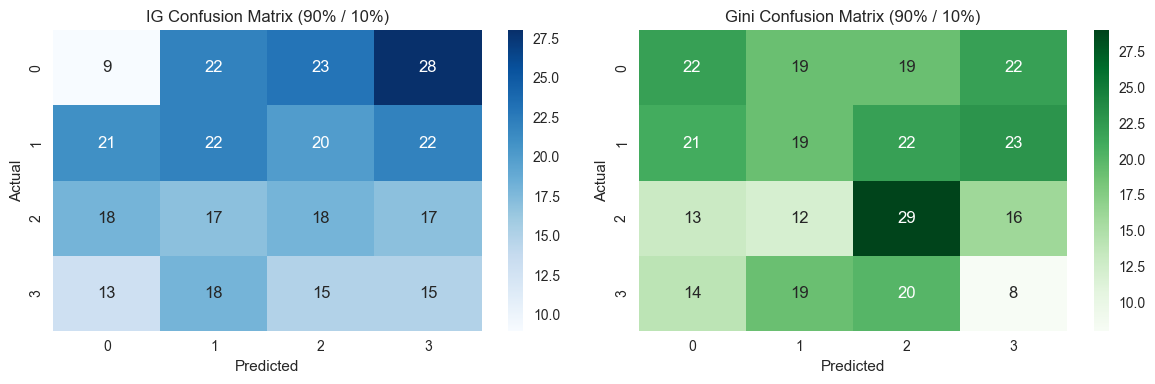

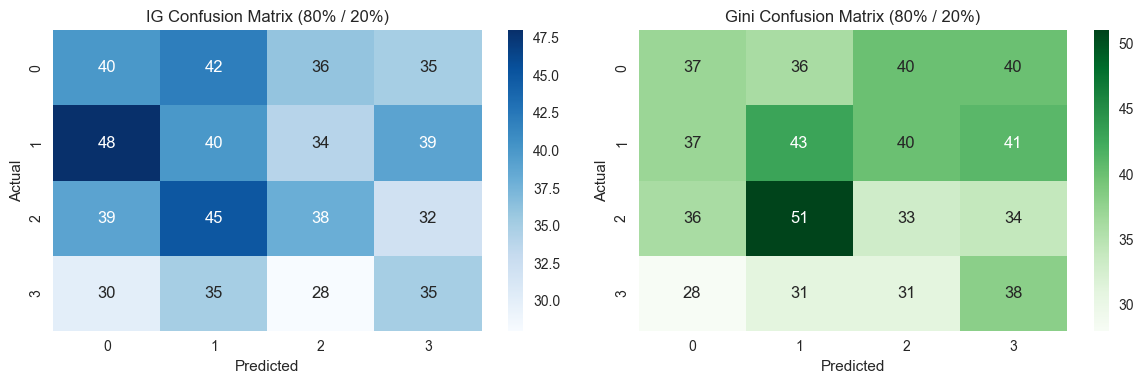

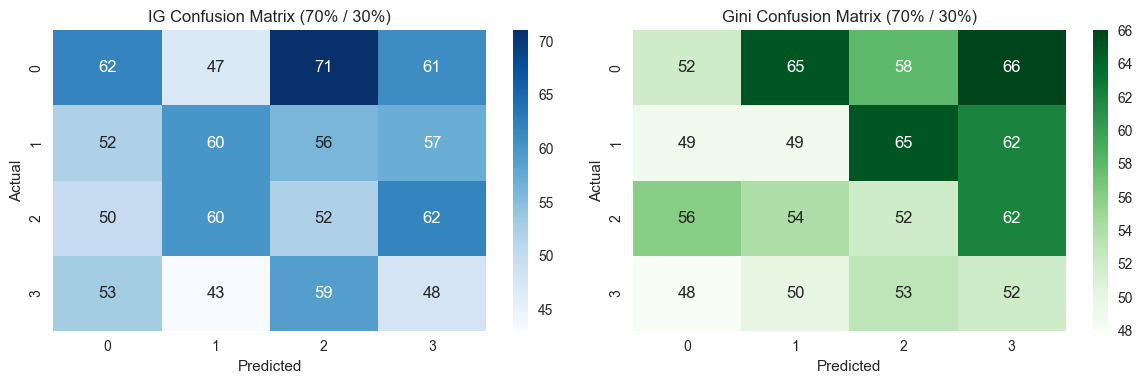

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

for train_size, test_size in splits:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=42)

    # IG
    clf_ig = DecisionTreeClassifier(criterion="entropy", random_state=42)
    clf_ig.fit(X_train, y_train)
    y_pred_ig = clf_ig.predict(X_test)
    cm_ig = confusion_matrix(y_test, y_pred_ig)

    # Gini
    clf_gini = DecisionTreeClassifier(criterion="gini", random_state=42)
    clf_gini.fit(X_train, y_train)
    y_pred_gini = clf_gini.predict(X_test)
    cm_gini = confusion_matrix(y_test, y_pred_gini)

    split_label = f"{int(train_size*100)}% / {int(test_size*100)}%"

    # Plot
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    sns.heatmap(cm_ig, annot=True, fmt="d", cmap="Blues")
    plt.title(f"IG Confusion Matrix ({split_label})")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

    plt.subplot(1, 2, 2)
    sns.heatmap(cm_gini, annot=True, fmt="d", cmap="Greens")
    plt.title(f"Gini Confusion Matrix ({split_label})")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

    plt.tight_layout()
    plt.show()


##### Clustering Evaluation Table

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

df = pd.read_csv("Dataset/Balanced_Processed_dataset.csv")

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

k_values = [2, 3, 4]
silhouette_scores = []
wcss_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_scaled)

    silhouette_avg = silhouette_score(df_scaled, labels)
    wcss = kmeans.inertia_

    silhouette_scores.append(silhouette_avg)
    wcss_values.append(wcss)

clustering_df = pd.DataFrame({
    "K": k_values,
    "Average Silhouette Width": silhouette_scores,
    "Total within-cluster SS": wcss_values
})

print(" Clustering Evaluation Table:")
display(clustering_df)


 Clustering Evaluation Table:


,K,Average Silhouette Width,Total within-cluster SS
0,2,0.046302,7874.464572
1,3,0.039761,7622.414328
2,4,0.041968,7429.628373


#### Elbow Method Analysis and Silhouette Score Analysis

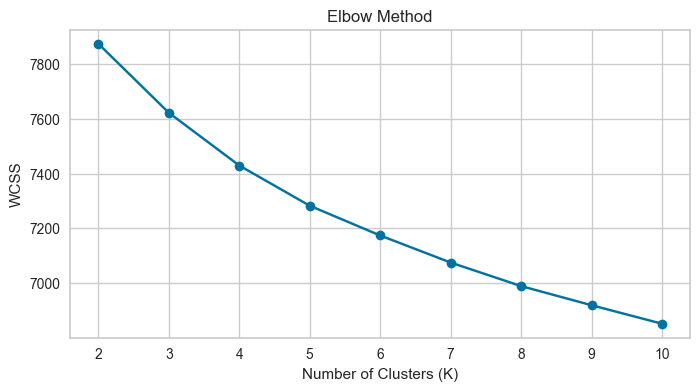

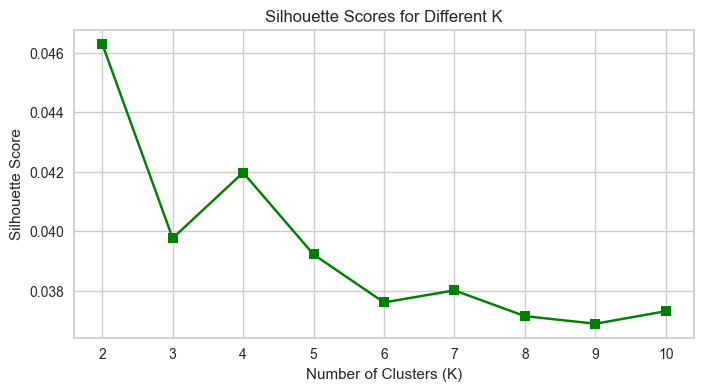

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

df = pd.read_csv("Dataset/Balanced_Processed_dataset.csv")
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

k_range = range(2, 11)
wcss = []
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_scaled)

    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, labels))

#  Elbow Method Plot
plt.figure(figsize=(8, 4))
plt.plot(k_range, wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

#  Silhouette Score Plot
plt.figure(figsize=(8, 4))
plt.plot(k_range, silhouette_scores, marker='s', color='green')
plt.title("Silhouette Scores for Different K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()


#### Elbow Method Analysis

The elbow plot shows a clear decrease in WCSS up to **K = 4**, after which the decrease becomes gradual. This suggests that **K = 4** may be a good choice in terms of internal coherence within clusters.

#### Silhouette Score Analysis

The silhouette score peaks at **K = 2**, indicating that this value provides the best separation of clusters. After K = 2, the scores decline and remain relatively low, indicating that adding more clusters increases internal similarity but reduces the clarity of separation.

- **K = 2**: Best for distinguishing between clusters (highest silhouette score).
- **K = 4**: Best for creating compact and internally consistent clusters (lowest WCSS).

The choice between the two depends on whether separation or coherence is more important for your analysis.

## 7. Findings

## 8. References

[1] Kaggle , “Corporate Stress Dataset,” Kaggle. [Online]. Available: https://www.kaggle.com/datasets/ashaychoudhary/corporate-stress-dataset-insights-into-workplace
<br>
[2] Scikit-learn documentation. [Online]. Available: https://scikit-learn.org/
<br>
[3] ChatGPT. [Online]. Available: https://chatgpt.com/